<a href="https://colab.research.google.com/github/Vamsiyadav-2000/Covid_cnn/blob/main/Covid_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import zipfile

local_zip = '/content/CT scan.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/CT scan')
zip_ref.close()

In [6]:

# Directory with our training covid pictures
train_COVID = os.path.join('/content/CT scan/CT_COVID')

# Directory with our training non_covid pictures
train_non_COVID = os.path.join('/content/CT scan/CT_NonCOVID')

In [7]:
train_COVID_names = os.listdir(train_COVID)
print(train_COVID_names[:10])

train_non_COVID_names = os.listdir(train_non_COVID)
print(train_non_COVID_names[:10])

['2020.03.21.20040691-p18-67-8.png', '2020.02.27.20027557-p25-137%1.png', '2020.03.16.20036145-p19-128-1.png', '2020.02.10.20021584-p6-52%15.png', '2020.03.25.20037721-p27-174.png', '2020.03.03.20030353-p17-106%2.png', '2020.02.13.20022673-p13-77%2.png', '2020.02.10.20021584-p6-52%2.png', '2020.03.18.20038125-p15-54-2.png', '2020.03.07.20031393-p7-50%0.png']
['18%2.jpg', '174.png', '1263.png', '1306.png', '1814.png', '81%3.jpg', '69%0.jpg', '486.png', '75%1.jpg', '18%0.jpg']


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

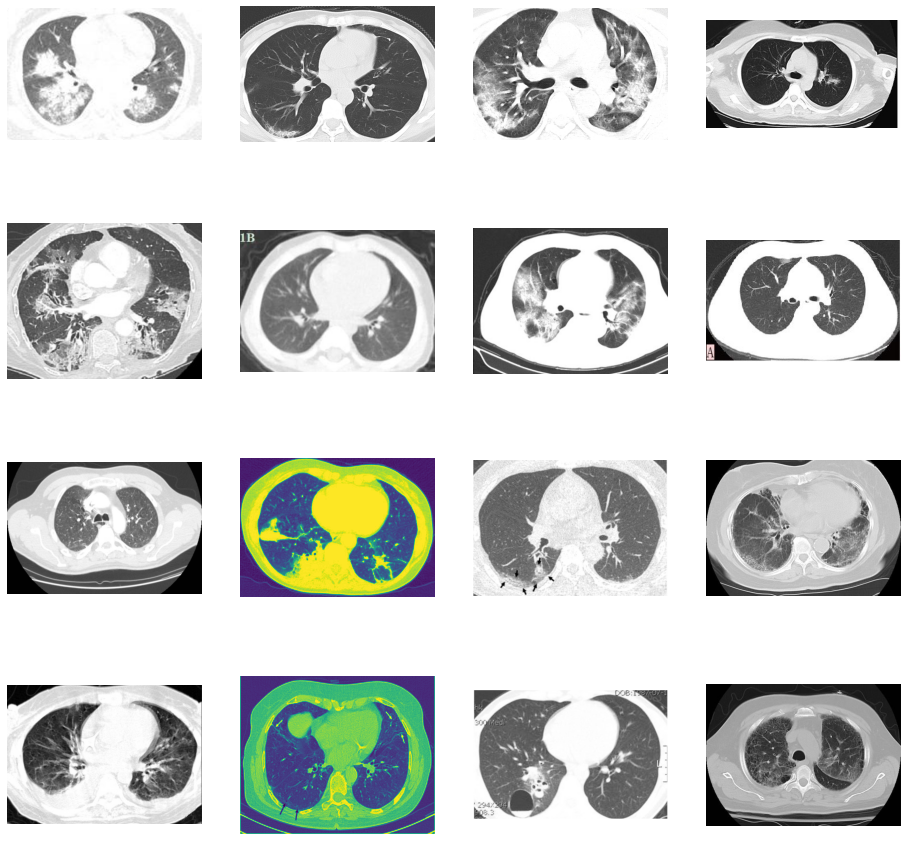

In [12]:

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_covid_pic = [os.path.join(train_COVID, fname) 
                for fname in train_COVID_names[pic_index-8:pic_index]]
next_non_covid_pic = [os.path.join(train_non_COVID, fname) 
                for fname in train_non_COVID_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_covid_pic+next_non_covid_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/CT scan',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 746 images belonging to 2 classes.


In [27]:
history = model.fit(
      train_generator,  
      epochs=30,
      verbose=1)

Epoch 1/30
6/6 [==============================] - 4s 597ms/step - loss: 0.4896 - accuracy: 0.7520
Epoch 2/30
6/6 [==============================] - 4s 608ms/step - loss: 0.3771 - accuracy: 0.8164
Epoch 3/30
6/6 [==============================] - 4s 605ms/step - loss: 0.3490 - accuracy: 0.8298
Epoch 4/30
6/6 [==============================] - 4s 639ms/step - loss: 0.3524 - accuracy: 0.8458
Epoch 5/30
6/6 [==============================] - 4s 601ms/step - loss: 0.3375 - accuracy: 0.8633
Epoch 6/30
6/6 [==============================] - 4s 626ms/step - loss: 0.3515 - accuracy: 0.8418
Epoch 7/30
6/6 [==============================] - 4s 623ms/step - loss: 0.2973 - accuracy: 0.8606
Epoch 8/30
6/6 [==============================] - 4s 605ms/step - loss: 0.3022 - accuracy: 0.8606
Epoch 9/30
6/6 [==============================] - 4s 640ms/step - loss: 0.2995 - accuracy: 0.8686
Epoch 10/30
6/6 [==============================] - 4s 625ms/step - loss: 0.2450 - accuracy: 0.8874
Epoch 11/30
6/6 [==

In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a non_covid affected person's x-ray")
  else:
    print(fn + " is a covid affected person's x-ray")
 

Saving 2020.03.09.20033118-p20-93%1.png to 2020.03.09.20033118-p20-93%1.png
[0.]
2020.03.09.20033118-p20-93%1.png is a covid affected person's x-ray
